## 多输入 & 多输出

多输入多输出主要有以下几个应用：
* 1.输入视频/图像，输入一个问句，输出关于这个视频的答句，输出视频/图片种类。
* 2.输入一个人A的问句，输入另一个人B的答句，输出这两个人在讨论什么话题，输出A接下来可能提出的问句。

这里案例使用输入一张图片和这个图片的标签，输出该图片标签的sin值【回归】和下一个图片标签的cos值【回归】。  
如：输入图片5，和对应的标签，输出ln(5)，输出cos(6)的值

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

## 载入数据

In [2]:
(x_train, y_train), (_, _) = mnist.load_data()

x_train = x_train / 255.5

sin_value = np.sin(y_train)
cos_value = np.cos(y_train + 1)

y_train = to_categorical(y_train, num_classes=10)

sin_value.shape, cos_value.shape

((60000,), (60000,))

## 搭建模型

In [3]:
image_input = Input(shape=(28, 28, 1), name='image_input')
label_input = Input(shape=(10, ), name='label_input')

# 标签全连接
dense_1 = Dense(16, activation='relu')(label_input)
dense_2 = Dense(16, activation='relu')(dense_1)

# 图片卷据
conv_1 = Conv2D(32, 3, padding='same', activation='relu')(image_input)
conv_2 = Conv2D(64, 3, padding='same', activation='relu')(conv_1)
maxp_1 = MaxPooling2D()(conv_2)

conv_3 = Conv2D(64, 3, padding='same', activation='relu')(maxp_1)
conv_4 = Conv2D(32, 3, padding='same', activation='relu')(conv_3)
maxp_2 = MaxPooling2D()(conv_4)

conv_5 = Conv2D(32, 3, padding='same', activation='relu')(maxp_2)
conv_6 = Conv2D(16, 3, padding='same', activation='relu')(conv_5)
maxp_3 = MaxPooling2D()(conv_6)

concate_layer = multiply([maxp_3, dense_2])
flatten = Flatten()(concate_layer)
dense_out_sin = Dense(16)(flatten)
dense_out_sin = Dense(1, name='sin_output')(dense_out_sin)

denee_out_cos = Dense(16)(flatten)
denee_out_cos = Dense(1, name='cos_output')(denee_out_cos)

并不是所有模型的最后一层都需要用激活函数，因为sin和cos本身可能出现负数，要是用了relu的话就会将负数部分抹除，与题意偏离

In [5]:
model = Model(inputs=[image_input, label_input], outputs=[dense_out_sin, denee_out_cos])

## 编译模型

In [6]:
model.compile(
    loss={
        'sin_output':'mae',
        'cos_output':'mae'
    },
    optimizer='adam'
)

In [7]:
model.fit(
    {'image_input': x_train,
     'label_input':y_train},
    {'sin_output':sin_value,
     'cos_output':cos_value},
    epochs=5,
    batch_size=256,
    verbose=1
)

Epoch 1/5
235/235 [==============================] - 12s 41ms/step - loss: 0.3933 - sin_output_loss: 0.1737 - cos_output_loss: 0.2196
Epoch 2/5
235/235 [==============================] - 9s 39ms/step - loss: 0.0398 - sin_output_loss: 0.0202 - cos_output_loss: 0.0196
Epoch 3/5
235/235 [==============================] - 9s 39ms/step - loss: 0.0301 - sin_output_loss: 0.0155 - cos_output_loss: 0.0146
Epoch 4/5
235/235 [==============================] - 9s 40ms/step - loss: 0.0349 - sin_output_loss: 0.0175 - cos_output_loss: 0.0174
Epoch 5/5
235/235 [==============================] - 9s 39ms/step - loss: 0.0254 - sin_output_loss: 0.0120 - cos_output_loss: 0.0134


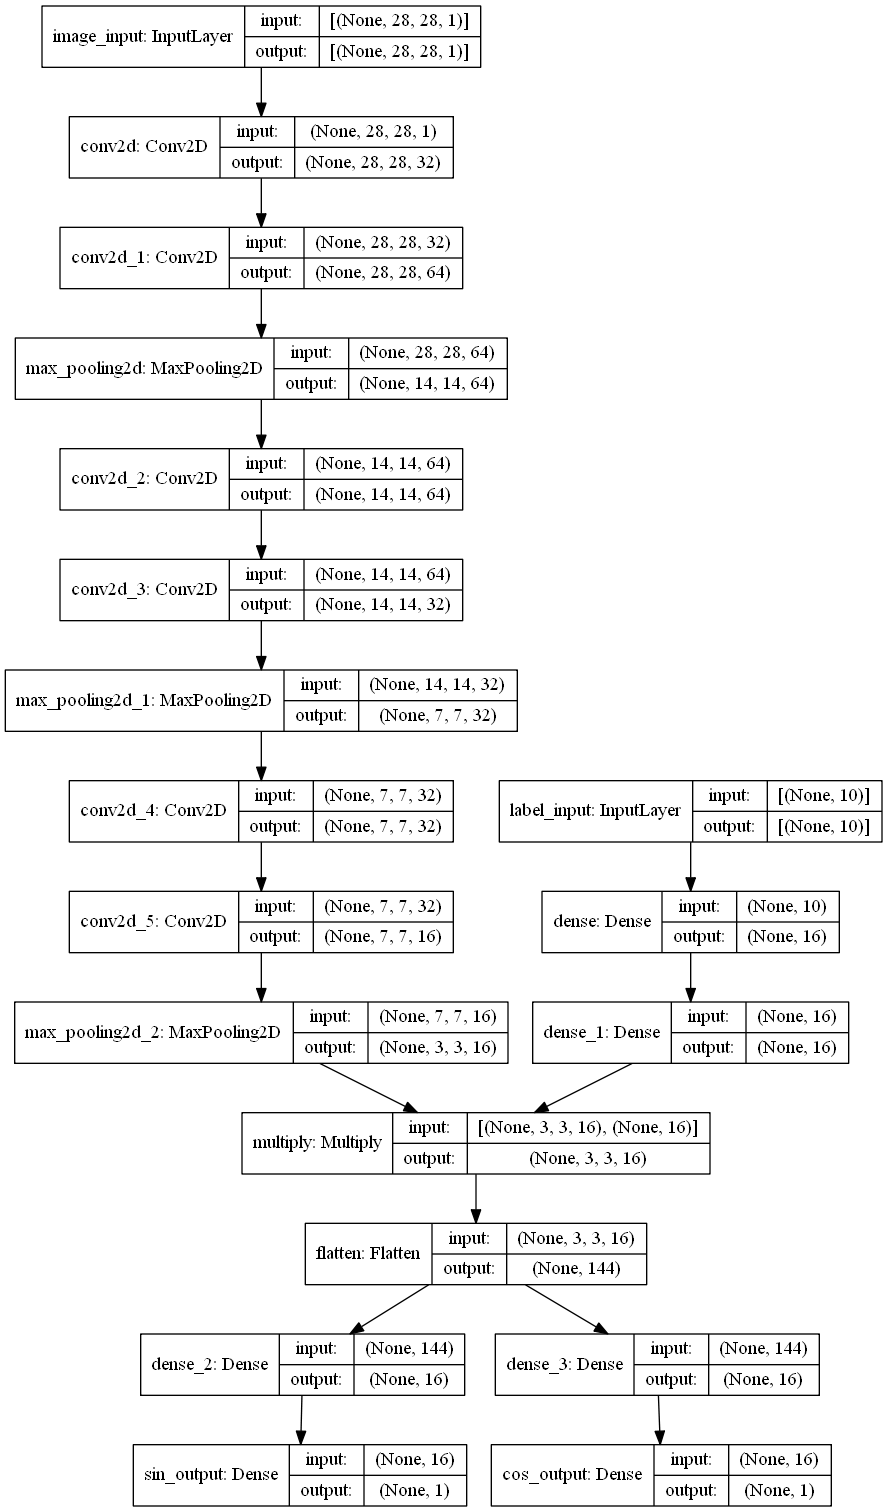

In [8]:
plot_model(model, show_shapes=True)

## 检查

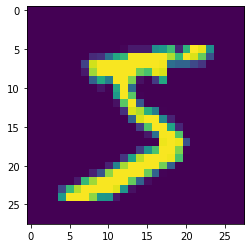

In [10]:
plt.imshow(x_train[0])

In [12]:
score = model.predict([x_train[0:1], y_train[0:1]])

In [13]:
score

[array([[-0.9832522]], dtype=float32), array([[0.9615818]], dtype=float32)]

In [14]:
np.sin(5), np.cos(5+1)

(-0.9589242746631385, 0.960170286650366)

## 模型预测与实际的差值

In [17]:
abs(score[0] - np.sin(5))

array([[0.02432793]], dtype=float32)

In [18]:
abs(score[1] - np.cos(5+1))

array([[0.00141156]], dtype=float32)